In [194]:
import os
import sys

from collections import Counter
import re 

import numpy as np
import matplotlib.pyplot as plt

import skimage as ski
from skimage import io
from skimage.color import rgb2gray
from skimage.color import rgb2hsv
from skimage.color import hsv2rgb
from skimage.filters import threshold_otsu
from skimage.feature import canny

from sklearn.cluster import KMeans
from sklearn.utils import shuffle

import cv2 

# Type Hint Libraries
from typing import Optional, Tuple, Union, TypeVar, List
import numpy.typing as npt
import matplotlib.figure

In [2]:
os.getcwd()

'C:\\Users\\rzamb\\Documents\\UMD\\640_Computer_Vision\\HW\\hw3\\Zambrano_Ricardo_ASN3_py'

In [3]:
PATH_POM_POKO_1 = '..\Zambrano_Ricardo_ASN3_py\pom_poko_1.jpg'
PATH_POM_POKO_2 = '..\Zambrano_Ricardo_ASN3_py\pom_poko_2.jpg'
PATH_ORCHID_1 = '..\Zambrano_Ricardo_ASN3_py\orchids_1.jpg'
PATH_ORCHID_2 = '..\Zambrano_Ricardo_ASN3_py\orchids_2.jpg'

In [4]:
# Loading images
pom_poko_1 = io.imread(PATH_POM_POKO_1)
pom_poko_2 = io.imread(PATH_POM_POKO_2)
orchids_1 = io.imread(PATH_ORCHID_1)
orchids_2 = io.imread(PATH_ORCHID_2)

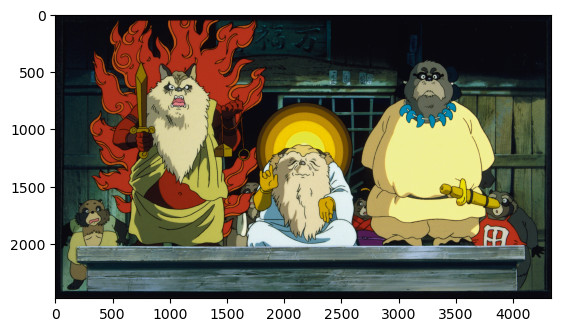

In [5]:
# Showing images used for the excercise
plt.imshow(pom_poko_1)
plt.show()

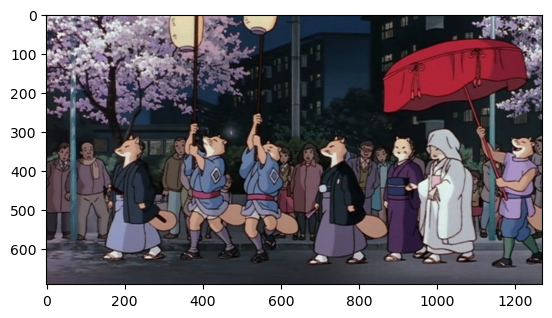

In [6]:
plt.imshow(pom_poko_2)
plt.show()

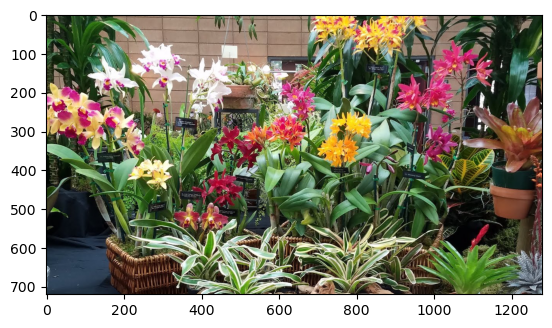

In [7]:
plt.imshow(orchids_1)
plt.show()

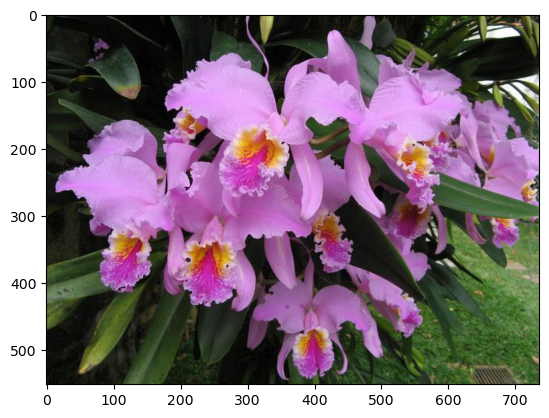

In [8]:
plt.imshow(orchids_2)
plt.show()

In [9]:
orchids_2.dtype

dtype('uint8')

**Programming 1** - Quantization with k-means

*Part (a)*

In [10]:
def quantizeRGB(origImg: npt.NDArray[np.uint8],k: int, use_sampling: bool = True) -> Tuple[npt.NDArray[np.uint8],np.ndarray]:
    """
    Takes an RGB image as imput, quantizes the three dimensional RGB space, and maps each pixel in 
    the imput image to its nearest k-means center
    
    Input:
        origImg, an image with dimmensions MxNx3 of data type uint8
        k, an interger, specifies the number of colors to quantize to
        use_sampling, a boolean if True it fits the k-means model using a sub-sample of the image. Defatult to True
    
    Output:
        outputImg, an image with dimmensions MxNx3 of data type uint8 
        meanColors, a kx3 array of the k centers
    
    Parameters
    ----------
    origImg : np.ndarray [shape=(M,N,3)]
    k: int
    
    Returns
    -------
    outputImg: np.ndarray [shape=(M,N,3)]
    meanColors: np.ndarray[shape=(k,3)]
    
    Throws
    ------
    Raises:AssertionError, if the number of channels in the origImg parameter does not equal 3
    Raises:AssertionError, if the data type in the array of the origImg parameter is not np.uint8
    Raises:AssertionError, if the data type of the parameter k is not int
    Raises:AssertionError, if the parameter k is not greater than 1
    
    Examples
    --------
    >>>
    >>>
    """
    assert origImg.shape[2] == 3, 'Unexpected number of channels. Pass an image with 3 channels.'
    assert origImg.dtype == np.uint8, 'Unexpedted dtype. The function expects an RBG image of data type uint8.'
    assert type(k) == int, 'k should be an integer.'
    assert k > 1, 'The number of k-means centers has to be greater than 1.'
    
    img = origImg.astype(np.double) # Converts the image's default 8 bits integer coding into double data type
    
    w, h, d = tuple(img.shape) # Records the images shape
    image_array = np.reshape(img, (w * h, d)) # Transforms the image into a 2D array
    
    # K-Means model
    model = KMeans(n_clusters=k,  random_state=42) 
    
    if use_sampling:
        
        # The idea of using sampling to was adaptep from scikit-learn user's guide, available at:
        # https://scikit-learn.org/stable/auto_examples/cluster/plot_color_quantization.html#sphx-glr-auto-examples-cluster-plot-color-quantization-py
        
        image_array_sample = shuffle(image_array, random_state=42, n_samples=1_000)

        print('Fitting the model using sampling...')
        kmeans = model.fit(image_array_sample)
        labels = kmeans.predict(image_array)

        print('Model fit completed...')
        meanColors = model.cluster_centers_

        outputImg = meanColors[labels].reshape(w, h, d).astype(np.uint8)
        
    else:
        
        print('Fitting the model without sampling...')
        labels = model.fit_predict(image_array)

        print('Model fit completed...')
        meanColors = model.cluster_centers_

        outputImg = meanColors[labels].reshape(w, h, d).astype(np.uint8)
    
    return outputImg, meanColors

In [11]:
test1,colors = quantizeRGB(pom_poko_1,4,False)

Fitting the model without sampling...
Model fit completed...


In [12]:
print(pom_poko_1.shape)
print(test1.shape)
print(colors.shape)

(2475, 4333, 3)
(2475, 4333, 3)
(4, 3)


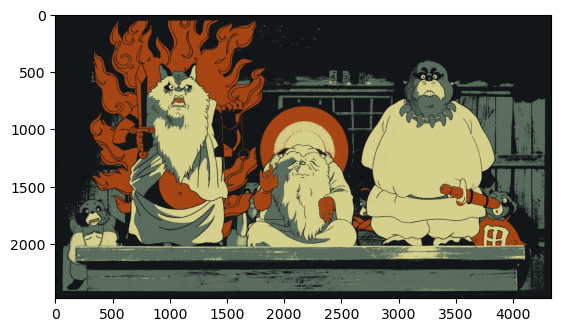

In [13]:
plt.imshow(test1)
plt.show()

In [14]:
test2,colors2 = quantizeRGB(pom_poko_1,4,True)

Fitting the model using sampling...
Model fit completed...


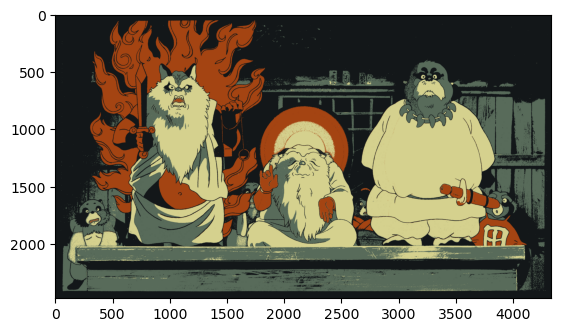

In [15]:
plt.imshow(test2)
plt.show()

In [16]:
test3,colors3 = quantizeRGB(pom_poko_1,8,True)

Fitting the model using sampling...
Model fit completed...


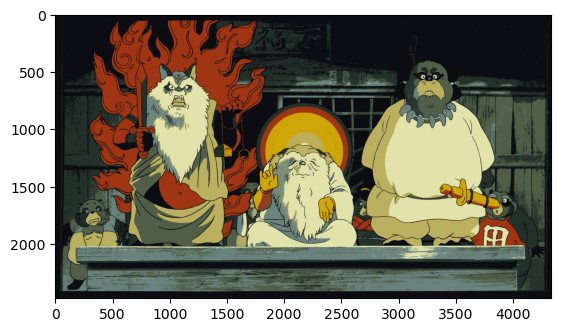

In [17]:
plt.imshow(test3)
plt.show()

In [18]:
colors3.shape

(8, 3)

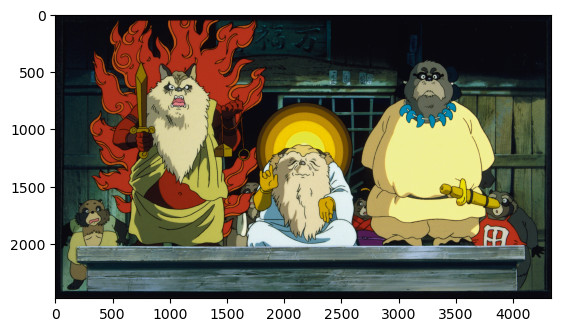

In [19]:
plt.imshow(pom_poko_1)
plt.show()

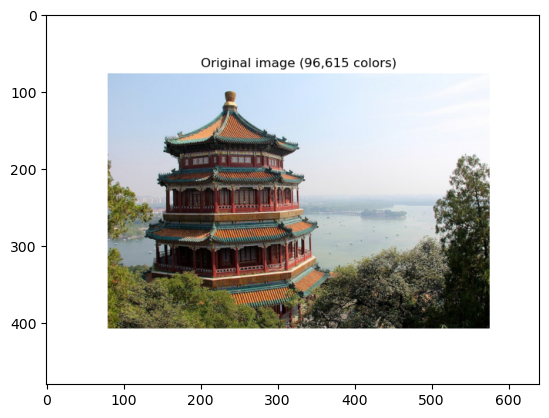

In [20]:
SUMMER_PALACE = '..\Zambrano_Ricardo_ASN3_py\summer_palace.png'
summer_palace = io.imread(SUMMER_PALACE)
plt.imshow(summer_palace)
plt.show()

Fitting the model using sampling...
Model fit completed...


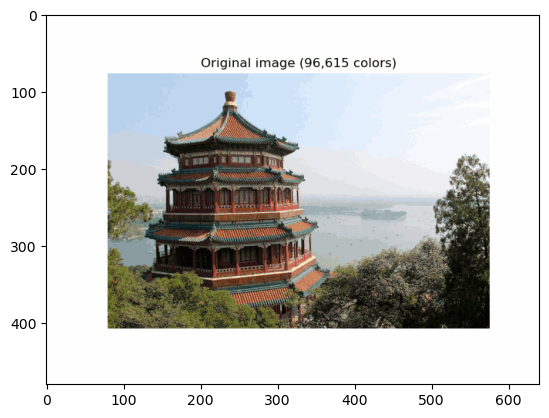

In [21]:
test4,colors4 = quantizeRGB(summer_palace,64,True)
plt.imshow(test4)
plt.show()

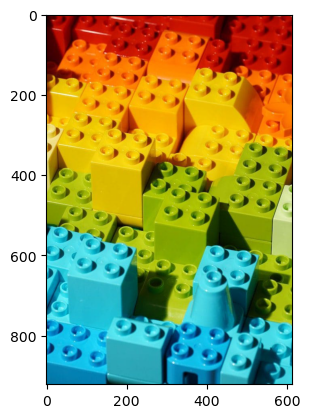

In [22]:
LEGOS = '..\Zambrano_Ricardo_ASN3_py\legos.jpg'
legos = io.imread(LEGOS)
plt.imshow(legos)
plt.show()

Fitting the model using sampling...
Model fit completed...


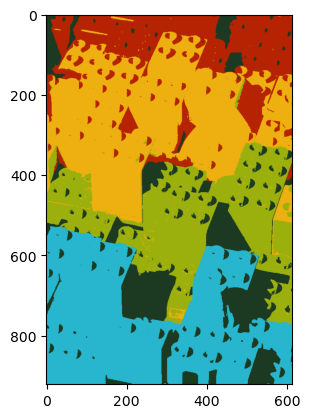

In [23]:
test5,colors5 = quantizeRGB(legos,5,True)
plt.imshow(test5)
plt.show()

Fitting the model using sampling...
Model fit completed...


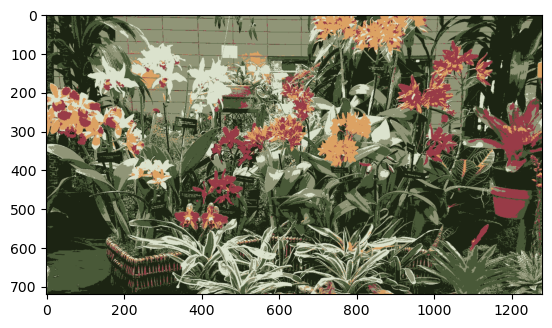

In [24]:
test6,colors6 = quantizeRGB(orchids_1,6,True)
plt.imshow(test6)
plt.show()

Fitting the model using sampling...
Model fit completed...


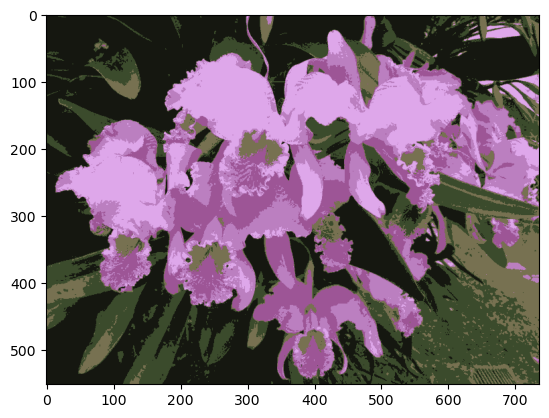

In [25]:
test7,colors7 = quantizeRGB(orchids_2,6,True)
plt.imshow(test7)
plt.show()

*Part (b)*

In [26]:
def quantizeHSV(origImg: npt.NDArray[np.uint8],k: int, use_sampling: bool = True) -> Tuple[npt.NDArray[np.uint8],np.ndarray]:
    """
    Takes an RGB image as imput, converts it to HSV and then quantizes the one dimensional hue space, 
    Next it maps each pixel in the input image to its nearest quantized hue value while keeping its saturation
    and value channelsthe same as the input. Finally it converts the image back to RGB
    
    Input:
        origImg, an image with dimmensions MxNx3 of data type uint8
        k, an interger, specifies the number of colors to quantize to
        use_sampling, a boolean if True it fits the k-means model using a sub-sample of the image. Defatult to True
    
    Output:
        outputImg, an image with dimmensions MxNx3 of data type uint8 
        meanHues, a kx1 array of the k hue centers
    
    Parameters
    ----------
    origImg : np.ndarray [shape=(M,N,3)]
    k: int
    
    Returns
    -------
    outputImg: np.ndarray [shape=(M,N,3)]
    meanHues: np.ndarray[shape=(k,1)]
    
    Throws
    ------
    Raises:AssertionError, if the number of channels in the origImg parameter does not equal 3
    Raises:AssertionError, if the data type in the array of the origImg parameter is not np.uint8
    Raises:AssertionError, if the data type of the parameter k is not int
    Raises:AssertionError, if the parameter k is not greater than 1
    
    Examples
    --------
    >>>
    >>>
    """
    assert origImg.shape[2] == 3, 'Unexpected number of channels. Pass an image with 3 channels.'
    assert origImg.dtype == np.uint8, 'Unexpedted dtype. The function expects an RBG image of data type uint8.'
    assert type(k) == int, 'k should be an integer.'
    assert k > 1, 'The number of k-means centers has to be greater than 1.'
    
    hsv_img = rgb2hsv(origImg) # Converts he original image from RGB to HSV
    
    w, h, _ = tuple(hsv_img.shape) # Records the images shape
    d = 1 # The image has 3 channels, however, the k-mean centers will be calculated only in the 1-d hue channel. This is why d=1
    
    # Separate the channels to isolate them
    hue_img = hsv_img[:, :, 0]
    saturation_img = hsv_img[:, :, 1]
    value_img = hsv_img[:, :, 2]
    
    image_array = np.reshape(hue_img, (w * h, d)) # Reshapes the image to be processed by k-means function
    
    # K-Means model
    model = KMeans(n_clusters=k,  random_state=42) 
    
    if use_sampling:
        
        # The idea of using sampling to was adaptep from scikit-learn user's guide, available at:
        # https://scikit-learn.org/stable/auto_examples/cluster/plot_color_quantization.html#sphx-glr-auto-examples-cluster-plot-color-quantization-py
        
        image_array_sample = shuffle(image_array, random_state=42, n_samples=1_000)

        print('Fitting the model using sampling...')
        kmeans = model.fit(image_array_sample)
        labels = kmeans.predict(image_array)

        print('Model fit completed...')
        meanHues = model.cluster_centers_

        outputHue = meanHues[labels].reshape(w, h)
        
        outputImg = np.stack((outputHue, saturation_img, value_img), axis=2)
        outputImg = hsv2rgb(outputImg)
        outputImg = outputImg*255
        outputImg = outputImg.astype(np.uint8)
        
    else:
        
        print('Fitting the model without sampling...')
        labels = model.fit_predict(image_array)

        print('Model fit completed...')
        meanHues = model.cluster_centers_

        outputHue = meanHues[labels].reshape(w, h)   
        
        outputImg = np.stack((outputHue, saturation_img, value_img), axis=2)
        outputImg = hsv2rgb(outputImg)
        outputImg = outputImg*255
        outputImg = outputImg.astype(np.uint8)
    
    return outputImg, meanHues

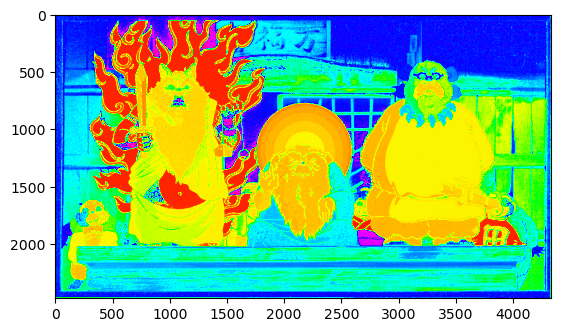

In [27]:
hsv_img = rgb2hsv(pom_poko_1)
hue_img = hsv_img[:, :, 0]
saturation_img = hsv_img[:, :, 1]
value_img = hsv_img[:, :, 2]
plt.imshow(hue_img, cmap='hsv')
plt.show()

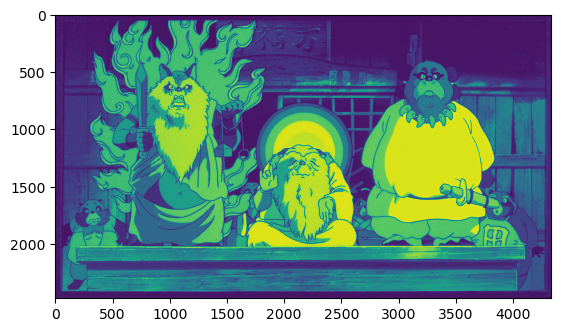

In [28]:
plt.imshow(value_img)
plt.show()

In [29]:
hsv_img.shape

(2475, 4333, 3)

In [30]:
hue_img.shape

(2475, 4333)

In [31]:
2475*4333

10724175

In [32]:
hue_img.dtype

dtype('float64')

In [33]:
hue_img[0:2,]

array([[0.02777778, 0.04545455, 0.11111111, ..., 0.02564103, 0.01111111,
        0.05882353],
       [0.02564103, 0.04545455, 0.03333333, ..., 0.03333333, 0.98333333,
        0.02777778]])

In [34]:
w, h = tuple(hue_img.shape)
image_array = np.reshape(hue_img, (w * h, 1))

In [35]:
image_array.shape

(10724175, 1)

In [36]:
image_array[0:2,]

array([[0.02777778],
       [0.04545455]])

In [37]:
model = KMeans(n_clusters=3,  random_state=42) 

In [38]:
image_array_sample = shuffle(image_array, random_state=42, n_samples=1_000)

kmeans = model.fit(image_array_sample)
labels = kmeans.predict(image_array)

meanHues = model.cluster_centers_

In [39]:
labels.shape

(10724175,)

In [40]:
meanHues

array([[0.13171662],
       [0.47955842],
       [0.69081232]])

In [41]:
outputHue = meanHues[labels].reshape(w, h)

In [42]:
outputHue.shape

(2475, 4333)

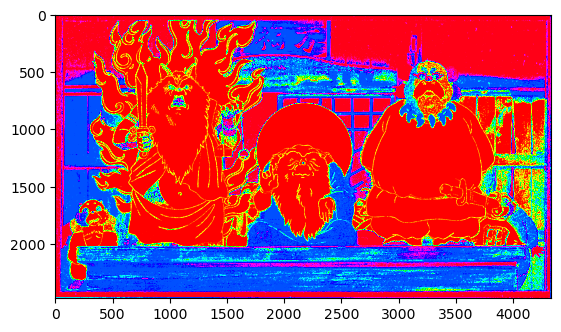

In [43]:
plt.imshow(outputHue, cmap='hsv')
plt.show()

In [44]:
outputImg = np.stack((outputHue, saturation_img, value_img), axis=2)

In [45]:
outputImg[:,:,0]==outputHue

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [46]:
outputImg = hsv2rgb(outputImg)

In [47]:
outputImg.dtype

dtype('float64')

In [48]:
outputImg = outputImg*255
outputImg = outputImg.astype(np.uint8)

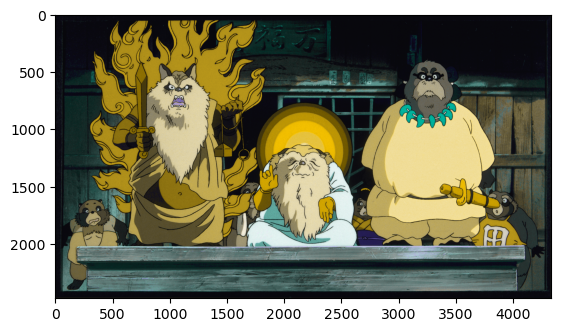

In [49]:
plt.imshow(outputImg)
plt.show()

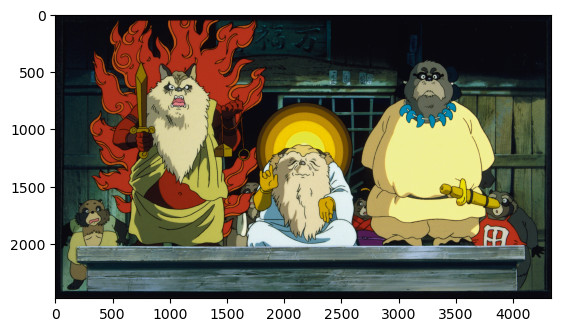

In [50]:
plt.imshow(pom_poko_1)
plt.show()

Fitting the model using sampling...
Model fit completed...


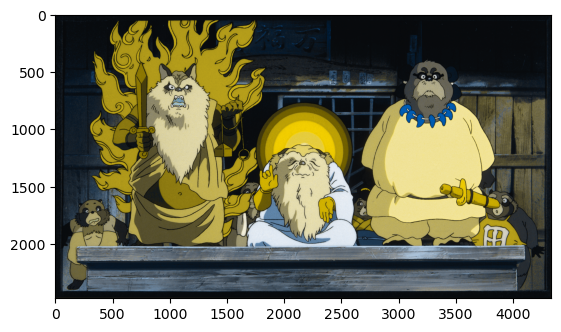

In [51]:
b, col_cent = quantizeHSV(pom_poko_1,2)
plt.imshow(b)
plt.show()

Fitting the model using sampling...
Model fit completed...


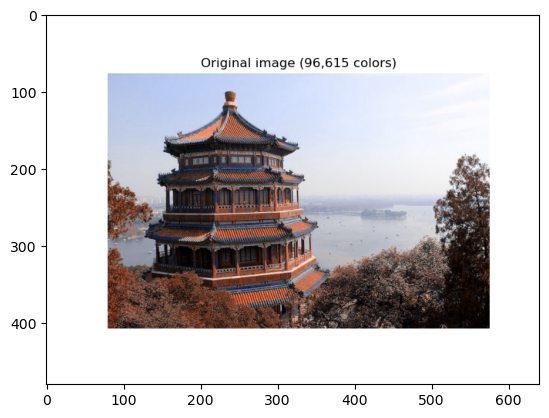

In [52]:
c, col_cent_2 = quantizeHSV(summer_palace,2)
plt.imshow(c)
plt.show()

*Part (c)*

In [53]:
def computeQuantizationError(origImg: npt.NDArray[np.uint8],quantizedImg: npt.NDArray[np.uint8])-> float:
    """
    Computes the sum of squared error (SSD error) between the pixel values of an RGB image and the pixel values of a 
    quantized version of the image.
    
    Input:
        origImg, an image with dimmensions MxNx3 of data type uint8
        quantizedImg, an image with dimmensions MxNx3 of data type uint8. It is assumed this image is a quantized version
        of origImg
    
    Output:
        error, sum of squared error, a float
        
    Parameters
    ----------
    origImg : np.ndarray [shape=(M,N,3)]
    quantizedImg: np.ndarray [shape=(M,N,3)]
    
    Returns
    -------
    error: float
    
    Throws
    ------
    Raises:AssertionError, if the number of channels in the origImg or quantizedImg parameters do not equal 3
    Raises:AssertionError, if the data type in the array of the origImg or quantizedImg parameters are not np.uint8
    Raises:AssertionError, if the images dimensions do not match
    
    Examples
    --------
    >>>
    >>>
    """
    assert origImg.shape[2] == 3, 'Unexpected number of channels. Pass an image with 3 channels.'
    assert origImg.dtype == np.uint8, 'Unexpedted dtype. The function expects an RBG image of data type uint8.'
    assert quantizedImg.shape[2] == 3, 'Unexpected number of channels. Pass an image with 3 channels.'
    assert quantizedImg.dtype == np.uint8, 'Unexpedted dtype. The function expects an RBG image of data type uint8.'    
    
    w, h, d = tuple(origImg.shape) # Records the images shape
    x, y, z = tuple(quantizedImg.shape) # Records the images shape
    
    assert (w==x) and (h==y) and (d==z), 'The images must have the same size.'
    
    img = origImg.astype(np.double) # Converts the image's default 8 bits integer coding into double data type
    qimg = quantizedImg.astype(np.double) # Converts the image's default 8 bits integer coding into double data type
    
    error = np.sum((img - qimg) ** 2)
    
    return error

In [54]:
w, h, d = pom_poko_1.shape
x, y, z = b.shape

In [55]:
(w==x) and (h==y) and (d==z)

True

In [56]:
zz= np.arange(12).reshape((2,2,3))
zz

array([[[ 0,  1,  2],
        [ 3,  4,  5]],

       [[ 6,  7,  8],
        [ 9, 10, 11]]])

In [57]:
xx = np.arange(12,24).reshape((2,2,3))
xx

array([[[12, 13, 14],
        [15, 16, 17]],

       [[18, 19, 20],
        [21, 22, 23]]])

In [58]:
err = np.sum((zz - xx) ** 2)
err

1728

In [59]:
err/(2*2*3)

144.0

In [60]:
err2 = 0
for k in range(3):
    print('channel',k)
    for i in range(2):
        for j in range(2):
            diff = zz[i,j,k]-xx[i,j,k]
            diff_sq = diff*diff
            err2 = err2 + diff_sq

err2

channel 0
channel 1
channel 2


1728

In [61]:
computeQuantizationError(zz.astype(np.uint8),xx.astype(np.uint8))

1728.0

In [62]:
computeQuantizationError(pom_poko_1,b)

10922020303.0

In [63]:
computeQuantizationError(pom_poko_1,test2)

21687340903.0

In [64]:
21687340903.0>10922020303.0

True

*Part (d)*

In [65]:
def getHueHists(im: npt.NDArray[np.uint8], k: int)-> Tuple[matplotlib.figure.Figure,matplotlib.figure.Figure]:
    """
    Computes and display two histograms of the hue values of the input image. The first histogram uses 
    equally-spaced bins (uniformly dividing up the hue values). The second histogram use bins defined 
    by the k cluster center memberships.
    
    Input:
        im, a matrix with dimmensions MxNx3 of data type uint8 that represents an image
        k, an interger, specifies the number of colors to quantize to
    
    Output:
        histEqual, a histogram that uses equally-spaced bins (uniformly dividing up the hue values)
        histclustered, a  histogram that uses bins defined by the k cluster center memberships 
        (ie., all pixels belonging to hue cluster i go to the i-th bin, for i=1,...k)
    
    Parameters
    ----------
    im : np.ndarray [shape=(M,N,3)]
    k: int
    
    Returns
    -------
    histEqual: matplotlib.figure
    histclustered: matplotlib.figure
    
    Throws
    ------
    Raises:AssertionError, if the number of channels in im parameter does not equal 3
    Raises:AssertionError, if the data type in the array of the im parameter is not np.uint8
    Raises:TypeError, is k is not of type int and the provided parameter's type cannot be casted into int 
    
    Examples
    --------
    >>>
    >>>
    """
    assert im.shape[2] == 3, 'Unexpected number of channels. Pass an image with 3 channels.'
    assert im.dtype == np.uint8, 'Unexpedted dtype. The function expects an RBG image of data type uint8.'
    if type(k) != int:
        print("Converting parameter k into integer type...")
        try:
            k = int(k)
        except:
            print("Unexpected data type on parameter k. Please provide a valid data type, in this case integer...")
            print("... Cannot run getHueHists(). Try again!")
            return -1
    
    hsv_img = rgb2hsv(im) # Converts he original image from RGB to HSV
    hue_img = hsv_img[:, :, 0] # Extracts the hue layer from the original image
    
    quantized_im, k_centers = quantizeHSV(origImg = im, k = k)
    
    histEqual = plt.figure()
    plt.hist(hue_img.ravel(), 36)
    plt.title("Histogram of the Hue channel")
    
    hsv_q_img = rgb2hsv(quantized_im)
    hue_q_img = hsv_q_img[:, :, 0]
    
    histclustered = plt.figure()
    plt.hist(hue_q_img.ravel(), 36)
    plt.title("Histogram of the Hue channel of Quantized Image")
    
    return histEqual, histclustered

In [66]:
q_im, k_cent = quantizeHSV(pom_poko_1,4)

Fitting the model using sampling...
Model fit completed...


In [67]:
hsv_im = rgb2hsv(pom_poko_1)
hue_im = hsv_im[:, :, 0]

C:\Users\rzamb\anaconda3\envs\msml640\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


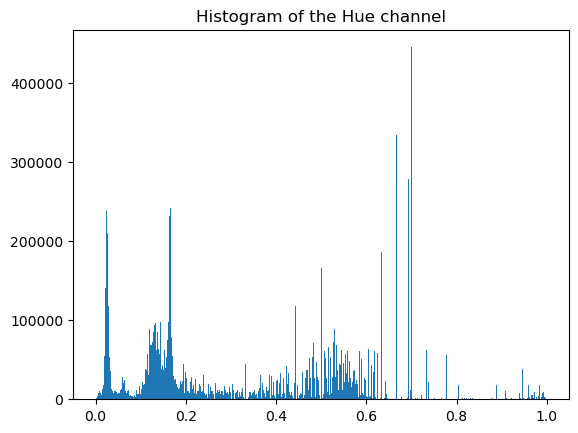

In [68]:
fig1 = plt.figure()
plt.hist(hue_im.ravel(), 512)
plt.title("Histogram of the Hue channel")
fig1.show()

In [69]:
hist_o, bin_ed = np.histogram(hue_im, bins=512, range=(0,1))

In [70]:
print(hist_o.shape)
print(bin_ed.shape)

(512,)
(513,)


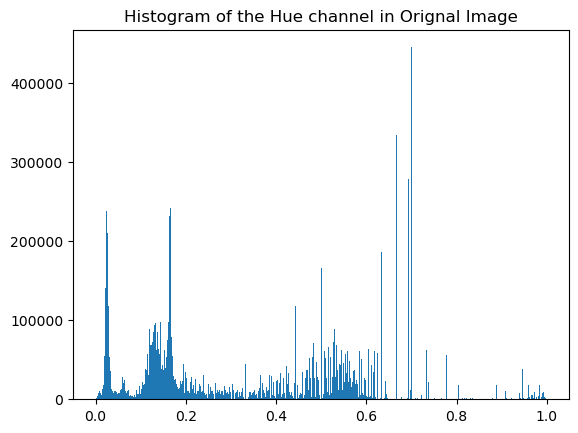

In [71]:
# Creating plot
# fig = plt.figure(figsize =(10, 7))
 
plt.hist(hue_im.ravel(), bins = 512) 
 
plt.title("Histogram of the Hue channel in Orignal Image") 
 
# show plot
plt.show()

In [72]:
hsv_q_im = rgb2hsv(q_im)
hue_q_im = hsv_q_im[:, :, 0]

C:\Users\rzamb\anaconda3\envs\msml640\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


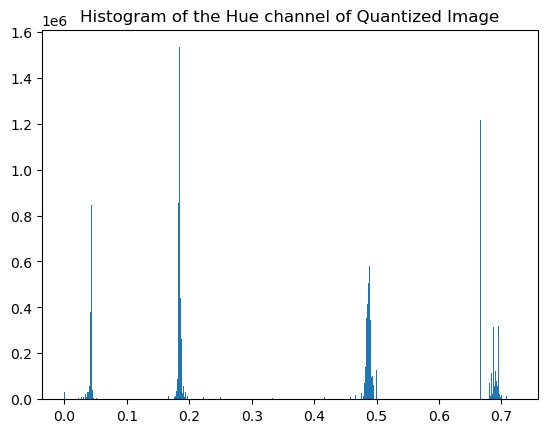

In [73]:
fig2 = plt.figure()
plt.hist(hue_q_im.ravel(), 512)
plt.title("Histogram of the Hue channel of Quantized Image")
fig2.show()

In [74]:
k_cent

array([[0.69340728],
       [0.04283101],
       [0.48980399],
       [0.1829398 ]])

Fitting the model using sampling...
Model fit completed...


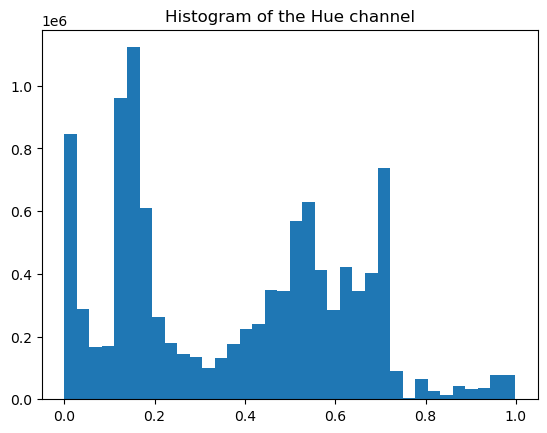

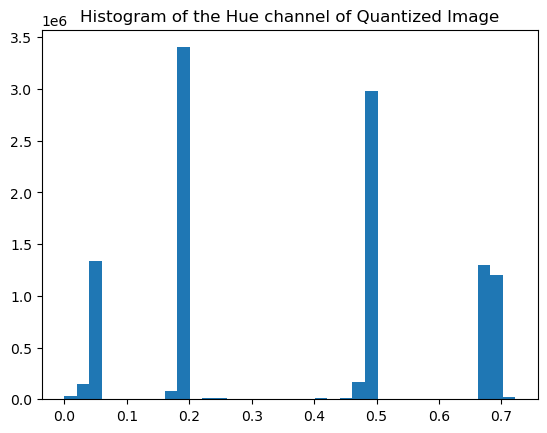

In [75]:
figA, figB = getHueHists(pom_poko_1,4)

**Programming 2** - Circle detection with the Hough Transform

In [285]:
def get_coord(accumulator_elem):
    return np.array([int(coord) for coord in re.sub(r'[^\d|\.]+', '', accumulator_elem[0])[:-1].split('.')])

In [316]:
def detectCircles(im: npt.NDArray[np.uint8], radius: float, useGradient: bool=False)-> npt.NDArray:
    """
    Implementation of Hough Transform to detect circles about the radius size of of the parameter 'radius'
    
    Input:
        im, an image with dimmensions MxNx3 of data type uint8
        radius, a float type, specifies the size of circle the function will be looking for
        useGradient, a boolen type, is a flag that allows the function's client to optionally exploit the gradient direction
        measured at the edge points. Defaults to False
    
    Output:
        centers,  an kx2 numpy array, in which each row lists the (x, y) position of a detected circles' center
        
    Parameters
    ----------
    im: np.ndarray [shape=(M,N,3)]
    radius: float
    useGradient: bool
    
    Returns
    -------
    centers: np.ndarray [shape=(k,2)]
    
    Throws
    ------
    Raises:AssertionError, if the number of channels in 'im' parameter does not equal 3
    Raises:AssertionError, if the data type in the array of 'im' parameter is not np.uint8
    Raises:AssertionError, if the useGradient flag is not a boolean type
    Raises:ValueError, if radius is not of type float and the provided parameter's type cannot be casted into float
    Raises:AssertionError, if value of radius is equal to zero or a negative number
    
    Examples
    --------
    >>>
    >>>
    """
    assert im.shape[2] == 3, 'Unexpected number of channels. Pass an image with 3 channels.'
    assert im.dtype == np.uint8, 'Unexpedted dtype. The function expects an RBG image of data type uint8.'
    assert type(useGradient)==bool, 'useGradient flag must be a boolen type.'
    
    if type(radius) != float:
        print("Casting radius into float type...")
        try:
            radius = float(radius)
        except:
            print("Unexpected data type on the radius parameter. Please provide a valid data type, in this case float...")
            print("... Cannot run detectCircles(). Try again!")
            return -1
    
    assert radius > 0, 'The radius parameter must be greater than 0.'
    
    # Transform the RGB image into grayscale image
    im_gray = ski.color.rgb2gray(im)
    
    # Apply Canny edge detection to the gray image
    im_edges = canny(im_gray, sigma=.70,low_threshold=0.55, high_threshold=0.8)
    
    # Finding coordinates for edges
    edges = np.argwhere(im_edges>0) 
    
    angles = np.linspace(0, 2*np.pi, 360) # Pre-computing angles to draw the circles in Hough space
    accumulator = Counter()

    for x,y in edges:
        a = np.array([])
        b = np.array([])
        for theta in angles:
            aa = int(x - np.round(radius*np.cos(theta)))
            a = np.append(a,[aa])
            bb = int(y + np.round(radius*np.sin(theta)))
            b = np.append(b,[bb])
        circle = np.c_[a,b] # circle in Hough space for x,y edge point
        for coord in circle:
            accumulator[str(coord)] += 1
    
    total_centers_houghSpace = len(accumulator)
    top_one_perc = int(total_centers_houghSpace*0.01)
    centers = np.zeros(shape=(top_one_perc,3),dtype=int)
    
    for i,elem in enumerate(accumulator.most_common(top_one_perc)):
        y,x = get_coord(elem)
        centers[i,:] = x,y,elem[1]
        
    return centers

In [77]:
# Images paths
DEER = '..\Zambrano_Ricardo_ASN3_py\eyes_deer.jpg'
BALLS = '..\Zambrano_Ricardo_ASN3_py\sports_balls.jpg'
COINS = '..\Zambrano_Ricardo_ASN3_py\coins.jpg'

In [78]:
# Loading images
eyes_deer = io.imread(DEER)
sports_balls = io.imread(BALLS)
coins = io.imread(COINS)

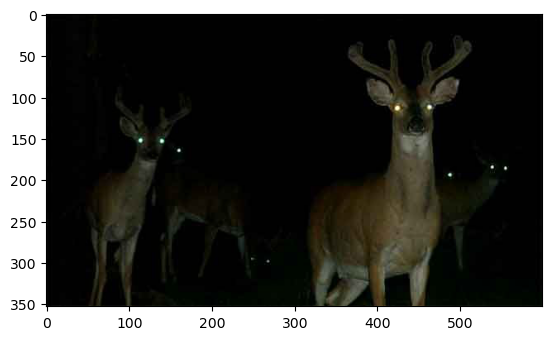

In [79]:
plt.imshow(eyes_deer)
plt.show()

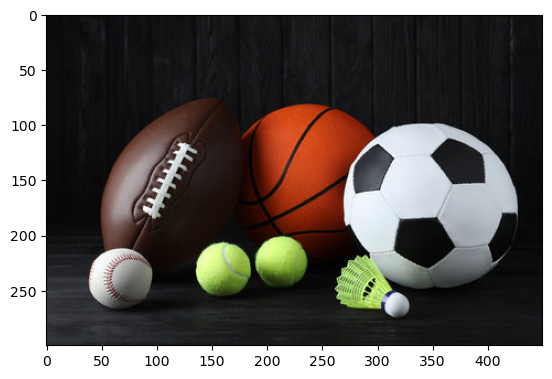

In [80]:
plt.imshow(sports_balls)
plt.show()

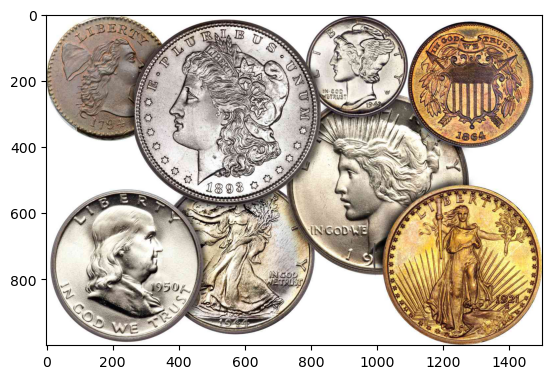

In [81]:
plt.imshow(coins)
plt.show()

In [82]:
eyes_deer_gray = ski.color.rgb2gray(eyes_deer)
sports_balls_gray = ski.color.rgb2gray(sports_balls)
coins_gray = ski.color.rgb2gray(coins)

In [219]:
eyes_deer_gray.dtype

dtype('float64')

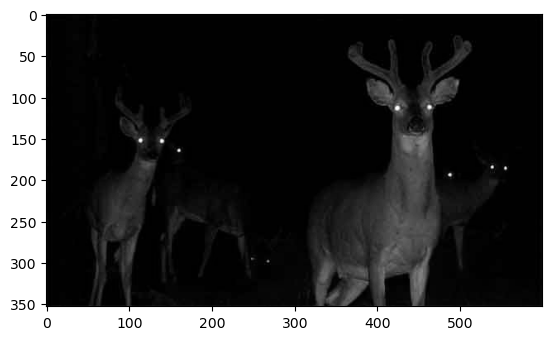

In [83]:
plt.imshow(eyes_deer_gray, cmap='gray')
plt.show()

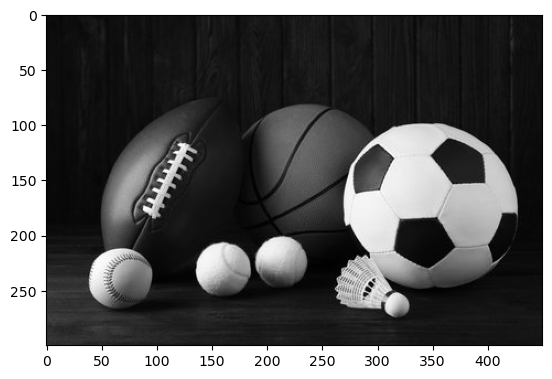

In [84]:
plt.imshow(sports_balls_gray, cmap='gray')
plt.show()

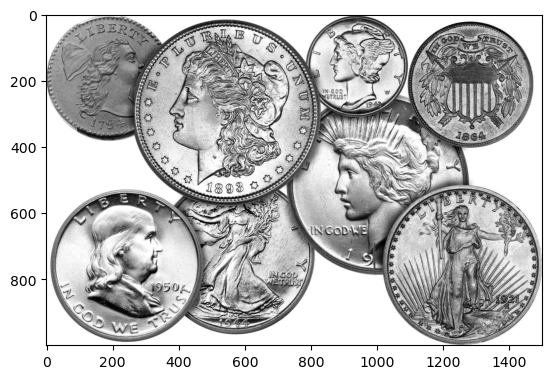

In [85]:
plt.imshow(coins_gray, cmap='gray')
plt.show()

In [86]:
# Preprocessing deer

eyes_deer_thresh = threshold_otsu(eyes_deer_gray) # Some of the deer eyes dissapear when using thresholding
deer_binary = eyes_deer_gray > eyes_deer_thresh

deer_edges = canny(eyes_deer_gray, sigma=.70,low_threshold=0.55, high_threshold=0.8) # Approach 2: Canny edge detection
# For the three images the best results were obtained by experimenting with different values of sigma

# Preprocessing balls

sports_balls_thresh = threshold_otsu(sports_balls_gray) # Basket ball dissapears with thresholding
sports_balls_binary = sports_balls_gray > sports_balls_thresh

sports_balls_edges = canny(sports_balls_gray, sigma=.70,low_threshold=0.55, high_threshold=0.8) # Approach 2: Canny edge detection

# Preprocessing coins

coins_thresh = threshold_otsu(coins_gray)
coins_binary = coins_gray > coins_thresh

coins_edges = canny(coins_gray, sigma=.70,low_threshold=0.55, high_threshold=0.8) # Approach 2: Canny edge detection

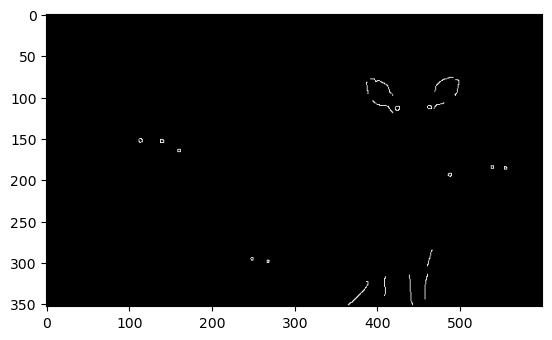

In [87]:
plt.imshow(deer_edges, cmap='gray')
plt.show()

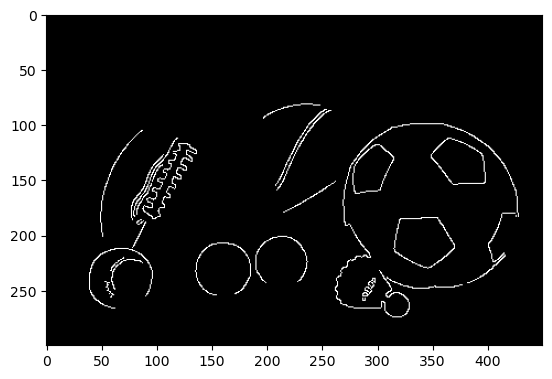

In [88]:
plt.imshow(sports_balls_edges, cmap='gray')
plt.show()

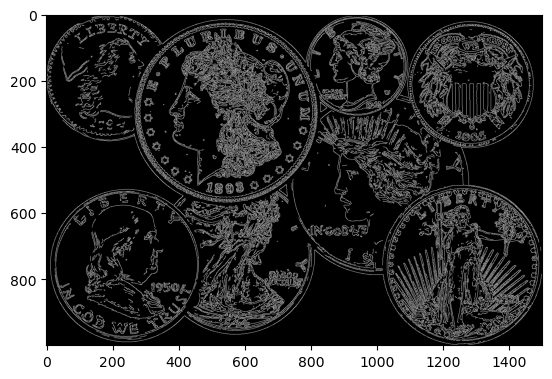

In [89]:
plt.imshow(coins_edges, cmap='gray')
plt.show()

In [237]:
deer_edges.shape

(353, 600)

In [235]:
#edges1 = np.argwhere(deer_edges[:,:])
edges = np.argwhere(deer_edges>0) # Finding coordinates for edges

In [236]:
for x,y in edges[:10]:
    print(x,y)

76 487
76 488
76 489
76 490
76 491
76 492
77 485
77 486
77 487
78 392


In [102]:
# theta = np.arange(0,360)*np.pi/180 # Computing values of theta
theta = np.linspace(0,360,360*4)*np.pi/180 # Computing values of theta
angles = np.linspace(0, 2*np.pi, 360*4) # Pre computing angles to draw the circles in Hough space

In [103]:
theta==angles

array([ True,  True,  True, ...,  True, False,  True])

In [112]:
r = 20
a = 10
b = 2

In [113]:
x = np.array([])
y = np.array([])
for angle in angles:
    xx = int(np.round(r*np.cos(angle)))
    x = np.append(x,[xx])
    yy = int(np.round(r*np.sin(angle)))
    y = np.append(y,[yy])

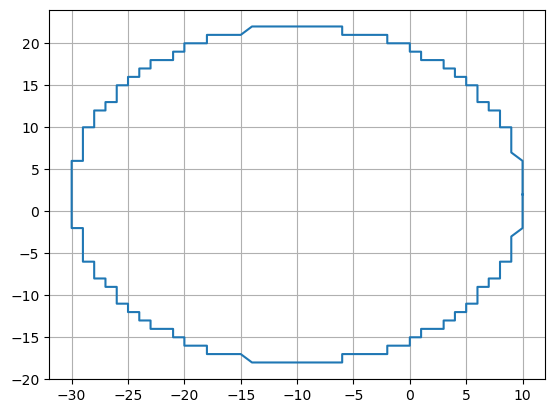

In [114]:
plt.plot(x-a,y+b)
plt.grid()
plt.show()

In [243]:
def circle_points(x_coord_center,y_coord_center,radius):
    angles = np.linspace(0, 2*np.pi, 360*4) # Pre computing angles to draw the circles in Hough space
    x = np.array([])
    y = np.array([])
    for angle in angles:
        xx = int(x_coord_center - np.round(radius*np.cos(angle)))
        #xx = int(np.round(radius*np.cos(angle)))
        x = np.append(x,[xx])
        yy = int(y_coord_center + np.round(radius*np.sin(angle)))
        #yy = int(np.round(radius*np.sin(angle)))
        y = np.append(y,[yy])
    circle = np.c_[x,y]
    
    return circle

In [282]:
def get_coord(accumulator_elem):
    return np.array([int(coord) for coord in re.sub(r'[^\d|\.]+', '', accumulator_elem[0])[:-1].split('.')])

In [172]:
r = 10
angles = np.linspace(0, 2*np.pi, 360) # Pre-computing angles to draw the circles in Hough space
accumulator = Counter()

for x,y in edges:
    a = np.array([])
    b = np.array([])
    for theta in angles:
        aa = int(x - np.round(r*np.cos(theta)))
        a = np.append(a,[aa])
        bb = int(y + np.round(r*np.sin(theta)))
        b = np.append(b,[bb])
    circle = np.c_[a,b] # circle in Hough space for x,y edge point
    for coord in circle:
        accumulator[str(coord)] += 1
    

In [221]:
accumulator.most_common(10)

[('[ 86. 488.]', 92),
 ('[ 86. 490.]', 91),
 ('[ 86. 489.]', 86),
 ('[ 89. 398.]', 85),
 ('[ 90. 481.]', 82),
 ('[120. 408.]', 82),
 ('[ 93. 405.]', 81),
 ('[ 88. 398.]', 79),
 ('[ 92. 405.]', 75),
 ('[ 84. 489.]', 74)]

In [251]:
ccc = accumulator
ccc.most_common(10)

[('[ 86. 488.]', 92),
 ('[ 86. 490.]', 91),
 ('[ 86. 489.]', 86),
 ('[ 89. 398.]', 85),
 ('[ 90. 481.]', 82),
 ('[120. 408.]', 82),
 ('[ 93. 405.]', 81),
 ('[ 88. 398.]', 79),
 ('[ 92. 405.]', 75),
 ('[ 84. 489.]', 74)]

In [238]:
yyy,xxx = get_coord(accumulator.most_common(1))
print(xxx)
print(yyy)

488
86


In [244]:
gg = circle_points(xxx,yyy,r)
gg[:,0]

array([478., 478., 478., ..., 478., 478., 478.])

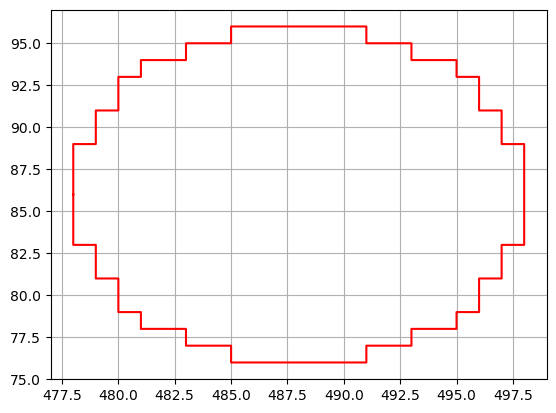

In [245]:
plt.plot(gg[:,0], gg[:,1], color='red')
plt.grid()
plt.show()

In [248]:
#edges[:1]

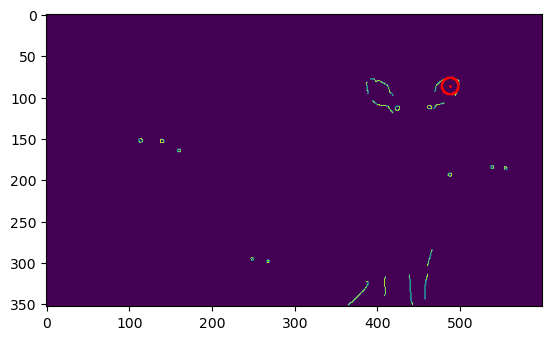

In [250]:
plt.imshow(deer_edges)
plt.plot(gg[:,0], gg[:,1], color='red')
plt.scatter(xxx, yyy,  color='red',s=1)

plt.show()

In [303]:
for i in range(len(accumulator.most_common(10))):
    elem = list(accumulator.most_common()[i])
    print(type(elem))

print(len(accumulator))
total_centers_houghSpace = len(accumulator)
top_one_perc = int(total_centers_houghSpace*0.01)
print(top_one_perc)

c = np.zeros(shape=(top_one_perc,3),dtype=int)

for i,elem in enumerate(accumulator.most_common(top_one_perc)):
    y,x = get_coord(elem)
    c[i,:] = x,y,elem[1]
    print(i,x,y,elem[1])

<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
12155
121
0 488 86 92
1 490 86 91
2 489 86 86
3 398 89 85
4 481 90 82
5 408 120 82
6 405 93 81
7 398 88 79
8 405 92 75
9 489 84 74
10 405 100 74
11 488 87 71
12 478 118 71
13 407 120 71
14 450 321 69
15 491 86 68
16 489 85 68
17 449 324 67
18 396 88 66
19 489 83 66
20 404 92 66
21 450 322 66
22 449 325 66
23 397 87 65
24 397 88 65
25 408 100 65
26 404 100 65
27 464 104 65
28 399 325 65
29 410 102 64
30 450 333 64
31 484 88 63
32 483 88 63
33 399 324 63
34 379 324 63
35 451 343 63
36 451 344 63
37 365 339 63
38 482 89 62
39 407 100 62
40 409 120 62
41 399 326 62
42 488 85 61
43 489 82 61
44 401 90 61
45 398 90 61
46 407 119 61
47 450 320 61
48 449 326 61
49 366 338 61
50 481 89 60
51 480 91 60
52 449 323 60
53 450 326 60
54 448 329 60
55 450 327 60
56 450 328 60
57 450 329 60
58 448 339 60
59 398 87 59
60 450 334 59
61 450 332 59
62 409 10

In [307]:
test1 = detectCircles(eyes_deer,10)
test1

Castingg radius into float type...


array([[488,  86,  92],
       [490,  86,  91],
       [489,  86,  86],
       [398,  89,  85],
       [481,  90,  82],
       [408, 120,  82],
       [405,  93,  81],
       [398,  88,  79],
       [405,  92,  75],
       [489,  84,  74],
       [405, 100,  74],
       [488,  87,  71],
       [478, 118,  71],
       [407, 120,  71],
       [450, 321,  69],
       [491,  86,  68],
       [489,  85,  68],
       [449, 324,  67],
       [396,  88,  66],
       [489,  83,  66],
       [404,  92,  66],
       [450, 322,  66],
       [449, 325,  66],
       [397,  87,  65],
       [397,  88,  65],
       [408, 100,  65],
       [404, 100,  65],
       [464, 104,  65],
       [399, 325,  65],
       [410, 102,  64],
       [450, 333,  64],
       [484,  88,  63],
       [483,  88,  63],
       [399, 324,  63],
       [379, 324,  63],
       [451, 343,  63],
       [451, 344,  63],
       [365, 339,  63],
       [482,  89,  62],
       [407, 100,  62],
       [409, 120,  62],
       [399, 326

In [314]:
gg2 = circle_points(test1[0,0],test1[0,1],10)
gg3 = circle_points(test1[3,0],test1[3,1],10)

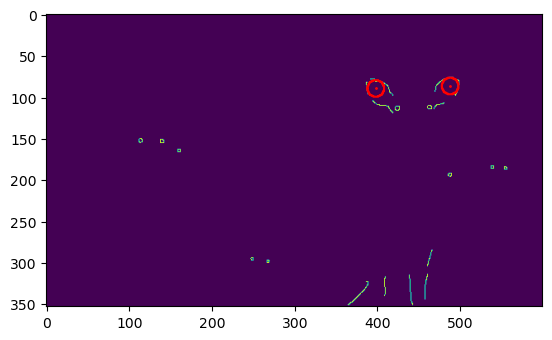

In [315]:
plt.imshow(deer_edges)
plt.plot(gg2[:,0], gg2[:,1], color='red')
plt.plot(gg3[:,0], gg3[:,1], color='red')
plt.scatter(test1[0,0], test1[0,1],  color='red',s=1)
plt.scatter(test1[3,0], test1[3,1],  color='red',s=1)
plt.show()